# Decision Tree Model

Creating a decision tree model to predict the outcome of an premier league game.

## Importing Libraries

In [1]:
# ML libraries
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score

# Data processing libraries
import pandas as pd
import numpy as np

# Visuals
from matplotlib import pyplot as plt

## Loading datasets

In [2]:
df = pd.read_csv(r"League_Result_Data/Encoded_PremierLeague_Stats_From_2014to2021.csv")
#time_df = pd.read_csv(r"League_Result_Data/TimeEncoded_PremierLeague_Stats_From_2014to2021.csv")

## Normal Dataset (Time Isn't Included)

### Splitting data

The data with be split into training and test data to ensure the integrity and proformance of the model

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2569 entries, 0 to 2568
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             2569 non-null   int64  
 1   Season                 2569 non-null   object 
 2   Season Encoding        2569 non-null   int64  
 3   Date                   2569 non-null   object 
 4   YearOfSeason           2414 non-null   object 
 5   HomeTeam               2569 non-null   object 
 6   HomeTeam Encoding      2569 non-null   int64  
 7   AwayTeam               2569 non-null   object 
 8   AwayTeam Encoding      2569 non-null   int64  
 9   FTHG                   2569 non-null   float64
 10  FTAG                   2569 non-null   float64
 11  FTR                    2569 non-null   object 
 12  FTR Encoding           2569 non-null   int64  
 13  HTHG                   2569 non-null   float64
 14  HTAG                   2569 non-null   float64
 15  HTR 

## Encodes the YearOfSeason values

In [4]:
df = df.dropna()

seasons = set(df['YearOfSeason'].values)
seasons = list(seasons)

# re-orders the list 
seasons = ['2014/15', '2015/16', '2016/17', '2017/18', '2018/19', '2019/20', '2020/21']
seasons

['2014/15', '2015/16', '2016/17', '2017/18', '2018/19', '2019/20', '2020/21']

In [5]:
df['YearOfSeason Encoding'] = -1

for index, value in df['YearOfSeason'].iteritems():
    
    # 2014/15: 0
    if value == seasons[0]:
        df.at[index, 'YearOfSeason Encoding'] = 0
    
    # 2015/16: 1
    if value == seasons[1]:
        df.at[index, 'YearOfSeason Encoding'] = 1
        
    # 2016/17: 2
    if value == seasons[2]:
        df.at[index, 'YearOfSeason Encoding'] = 2
    
    # 2017/18: 3
    if value == seasons[3]:
        df.at[index, 'YearOfSeason Encoding'] = 3
        
    # 2018/19: 4
    if value == seasons[4]:
        df.at[index, 'YearOfSeason Encoding'] = 4
        
    # 2019/20: 5
    if value == seasons[5]:
        df.at[index, 'YearOfSeason Encoding'] = 5
    
    # 2020/21: 6
    if value == seasons[6]:
        df.at[index, 'YearOfSeason Encoding'] = 6 

In [6]:
# Features -- Drops FTR and any categorical value 
X = df.drop(columns=["Season", "Unnamed: 0", "YearOfSeason", "Date", "FTHG", "FTAG", "HTHG", "HTAG", "HomeTeam", "AwayTeam", "Referee", "FTR", "FTR Encoding", "HTR", "HTR Encoding", "Referee"])
# Labels
y = df["FTR Encoding"]

X

,Season Encoding,HomeTeam Encoding,AwayTeam Encoding,Referee Encoding,Fouls Called Per Game,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,YearOfSeason Encoding
0,0,8,0,7,14.0,5.0,13.0,2.0,6.0,12.0,12.0,2.0,3.0,2.0,2.0,0.0,0.0,6
1,0,6,21,27,14.0,5.0,9.0,3.0,5.0,14.0,11.0,7.0,3.0,2.0,1.0,0.0,0.0,6
2,0,13,11,28,14.0,22.0,6.0,6.0,3.0,9.0,6.0,9.0,0.0,1.0,0.0,0.0,0.0,6
3,0,28,17,11,13.0,15.0,15.0,3.0,2.0,13.0,7.0,8.0,7.0,2.0,2.0,0.0,0.0,6
4,0,27,12,10,15.0,7.0,13.0,1.0,7.0,12.0,9.0,2.0,5.0,1.0,1.0,0.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2564,2,7,25,27,14.0,9.0,16.0,1.0,3.0,12.0,8.0,3.0,5.0,1.0,2.0,0.0,0.0,0
2565,2,10,15,15,13.0,16.0,7.0,6.0,1.0,12.0,15.0,8.0,1.0,2.0,2.0,0.0,1.0,0
2566,2,12,19,28,14.0,22.0,18.0,7.0,2.0,7.0,6.0,5.0,6.0,0.0,0.0,0.0,0.0,0
2567,2,14,21,2,14.0,15.0,13.0,6.0,4.0,13.0,8.0,8.0,4.0,1.0,1.0,0.0,0.0,0


In [7]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2414 entries, 0 to 2568
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Season Encoding        2414 non-null   int64  
 1   HomeTeam Encoding      2414 non-null   int64  
 2   AwayTeam Encoding      2414 non-null   int64  
 3   Referee Encoding       2414 non-null   int64  
 4   Fouls Called Per Game  2414 non-null   float64
 5   HS                     2414 non-null   float64
 6   AS                     2414 non-null   float64
 7   HST                    2414 non-null   float64
 8   AST                    2414 non-null   float64
 9   HF                     2414 non-null   float64
 10  AF                     2414 non-null   float64
 11  HC                     2414 non-null   float64
 12  AC                     2414 non-null   float64
 13  HY                     2414 non-null   float64
 14  AY                     2414 non-null   float64
 15  HR  

In [8]:
len(list(X.columns))

18

In [9]:
X

,Season Encoding,HomeTeam Encoding,AwayTeam Encoding,Referee Encoding,Fouls Called Per Game,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,YearOfSeason Encoding
0,0,8,0,7,14.0,5.0,13.0,2.0,6.0,12.0,12.0,2.0,3.0,2.0,2.0,0.0,0.0,6
1,0,6,21,27,14.0,5.0,9.0,3.0,5.0,14.0,11.0,7.0,3.0,2.0,1.0,0.0,0.0,6
2,0,13,11,28,14.0,22.0,6.0,6.0,3.0,9.0,6.0,9.0,0.0,1.0,0.0,0.0,0.0,6
3,0,28,17,11,13.0,15.0,15.0,3.0,2.0,13.0,7.0,8.0,7.0,2.0,2.0,0.0,0.0,6
4,0,27,12,10,15.0,7.0,13.0,1.0,7.0,12.0,9.0,2.0,5.0,1.0,1.0,0.0,0.0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2564,2,7,25,27,14.0,9.0,16.0,1.0,3.0,12.0,8.0,3.0,5.0,1.0,2.0,0.0,0.0,0
2565,2,10,15,15,13.0,16.0,7.0,6.0,1.0,12.0,15.0,8.0,1.0,2.0,2.0,0.0,1.0,0
2566,2,12,19,28,14.0,22.0,18.0,7.0,2.0,7.0,6.0,5.0,6.0,0.0,0.0,0.0,0.0,0
2567,2,14,21,2,14.0,15.0,13.0,6.0,4.0,13.0,8.0,8.0,4.0,1.0,1.0,0.0,0.0,0


In [10]:
"""
Target Varible - Full Time Results
0 - Home Team Win
1 - Away Team Win
2 - Draw
"""
y

0       1
1       0
2       0
3       1
4       1
       ..
2564    1
2565    2
2566    0
2567    0
2568    0
Name: FTR Encoding, Length: 2414, dtype: int64

In [11]:
# Splitting the data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
# Scaling varibles to unit variance
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

## Fitting the model

Fitting the data to a decision tree model

In [13]:
# Declaring the decision tree classifier
tree_clf = tree.DecisionTreeClassifier(max_leaf_nodes=10, 
                                      max_features=15,
                                      random_state=42,
                                      min_samples_split=3,
                                      max_depth=4,
                                      criterion='entropy')

# Training the decision tree
clf_train = tree_clf.fit(X_train, y_train)

In [14]:
score = clf_train.score(X_test, y_test)

print(score)

0.6128364389233955


In [15]:
results = clf_train.predict(X_test)
results

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

### Log Loss

In [16]:
scoring = 'neg_log_loss'
c_v_s_results = cross_val_score(clf_train, X_test, y_test, cv=3, scoring=scoring)
print("Logloss: %.3f (%.3f)" % (c_v_s_results.mean(), c_v_s_results.std()))

Logloss: -2.676 (0.438)


### R-Squared and Adjusted R-Squared

In [17]:
r2 = r2_score(y_train[:len(results)], results[:len(results)])
print('R^2: ' + str(r2))

R^2: -0.7087344913151361


In [18]:
# n = number of sample size
# p = number of independent variables
#Adj_r2 = 1-(1-R2)*(n-1)/(n-p-1)

adjusted_r2 = 1 - ((1-r2) * (len(results) - 1) / (len(results) - len(df.columns.tolist()) - 1) )
print('Adjusted R^2: ' + str(adjusted_r2))

Adjusted R^2: -0.8343207679596785


# Confusion Matrix

Confusion matrix, without normalization
[[184  30   0]
 [ 51 112   0]
 [ 76  30   0]]


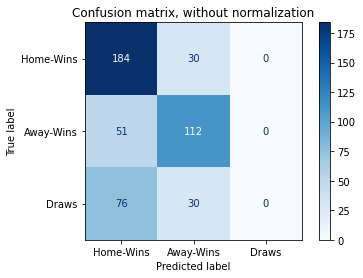

Normalized confusion matrix
[[0.85981308 0.14018692 0.        ]
 [0.31288344 0.68711656 0.        ]
 [0.71698113 0.28301887 0.        ]]


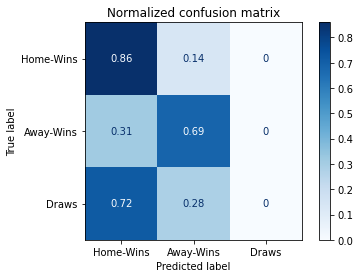

In [19]:
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

class_names=['Home-Wins', 'Away-Wins', 'Draws']

for title, normalize in titles_options:
    disp = plot_confusion_matrix(tree_clf, X_test, y_test,
                                 display_labels=class_names,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

    plt.show()

### Classification Report 

Precision Recall FMeasure & Support scores

In [20]:
y_test.size

483

In [21]:
results.size

483

In [22]:
results

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [23]:
p_r_f = precision_recall_fscore_support(y_test, results, average='macro')
p_r_f

C:\Users\Jake\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.4142675540267704, 0.5156432161764425, 0.45653636579009715, None)

In [24]:
y_train_pred = cross_val_predict(tree_clf, X_train, y_train, cv=3)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.59      0.79      0.68       874
           1       0.55      0.57      0.56       589
           2       0.32      0.10      0.15       468

    accuracy                           0.56      1931
   macro avg       0.49      0.49      0.46      1931
weighted avg       0.51      0.56      0.52      1931



### ROC Curve

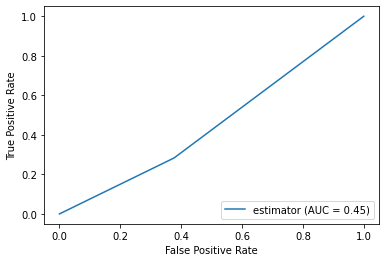

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, results, pos_label=2)

roc_auc = auc(fpr, tpr)

display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc,                                          estimator_name='estimator')
display.plot()  
plt.show()     

## Visualizing the tree

Create visual plots for the decision tree

In [26]:
fn = list(X.columns)
cn ='0', '1', '2'

In [27]:
cn

('0', '1', '2')

[Text(157.5529411764706, 195.696, 'X[7] <= -0.089\nentropy = 1.536\nsamples = 1931\nvalue = [874, 589, 468]'),
 Text(78.7764705882353, 152.208, 'X[8] <= 0.294\nentropy = 1.55\nsamples = 980\nvalue = [272, 431, 277]'),
 Text(39.38823529411765, 108.72, 'X[8] <= -1.033\nentropy = 1.581\nsamples = 587\nvalue = [214, 178, 195]'),
 Text(19.694117647058825, 65.232, 'entropy = 1.332\nsamples = 101\nvalue = [56, 10, 35]'),
 Text(59.082352941176474, 65.232, 'X[7] <= -0.847\nentropy = 1.584\nsamples = 486\nvalue = [158, 168, 160]'),
 Text(39.38823529411765, 21.744, 'entropy = 1.516\nsamples = 187\nvalue = [38, 84, 65]'),
 Text(78.7764705882353, 21.744, 'entropy = 1.569\nsamples = 299\nvalue = [120, 84, 95]'),
 Text(118.16470588235295, 108.72, 'X[8] <= 0.736\nentropy = 1.288\nsamples = 393\nvalue = [58, 253, 82]'),
 Text(98.47058823529412, 65.232, 'entropy = 1.491\nsamples = 118\nvalue = [29, 60, 29]'),
 Text(137.85882352941178, 65.232, 'entropy = 1.159\nsamples = 275\nvalue = [29, 193, 53]'),
 Te

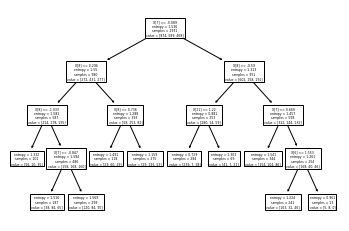

In [28]:
tree.plot_tree(clf_train)

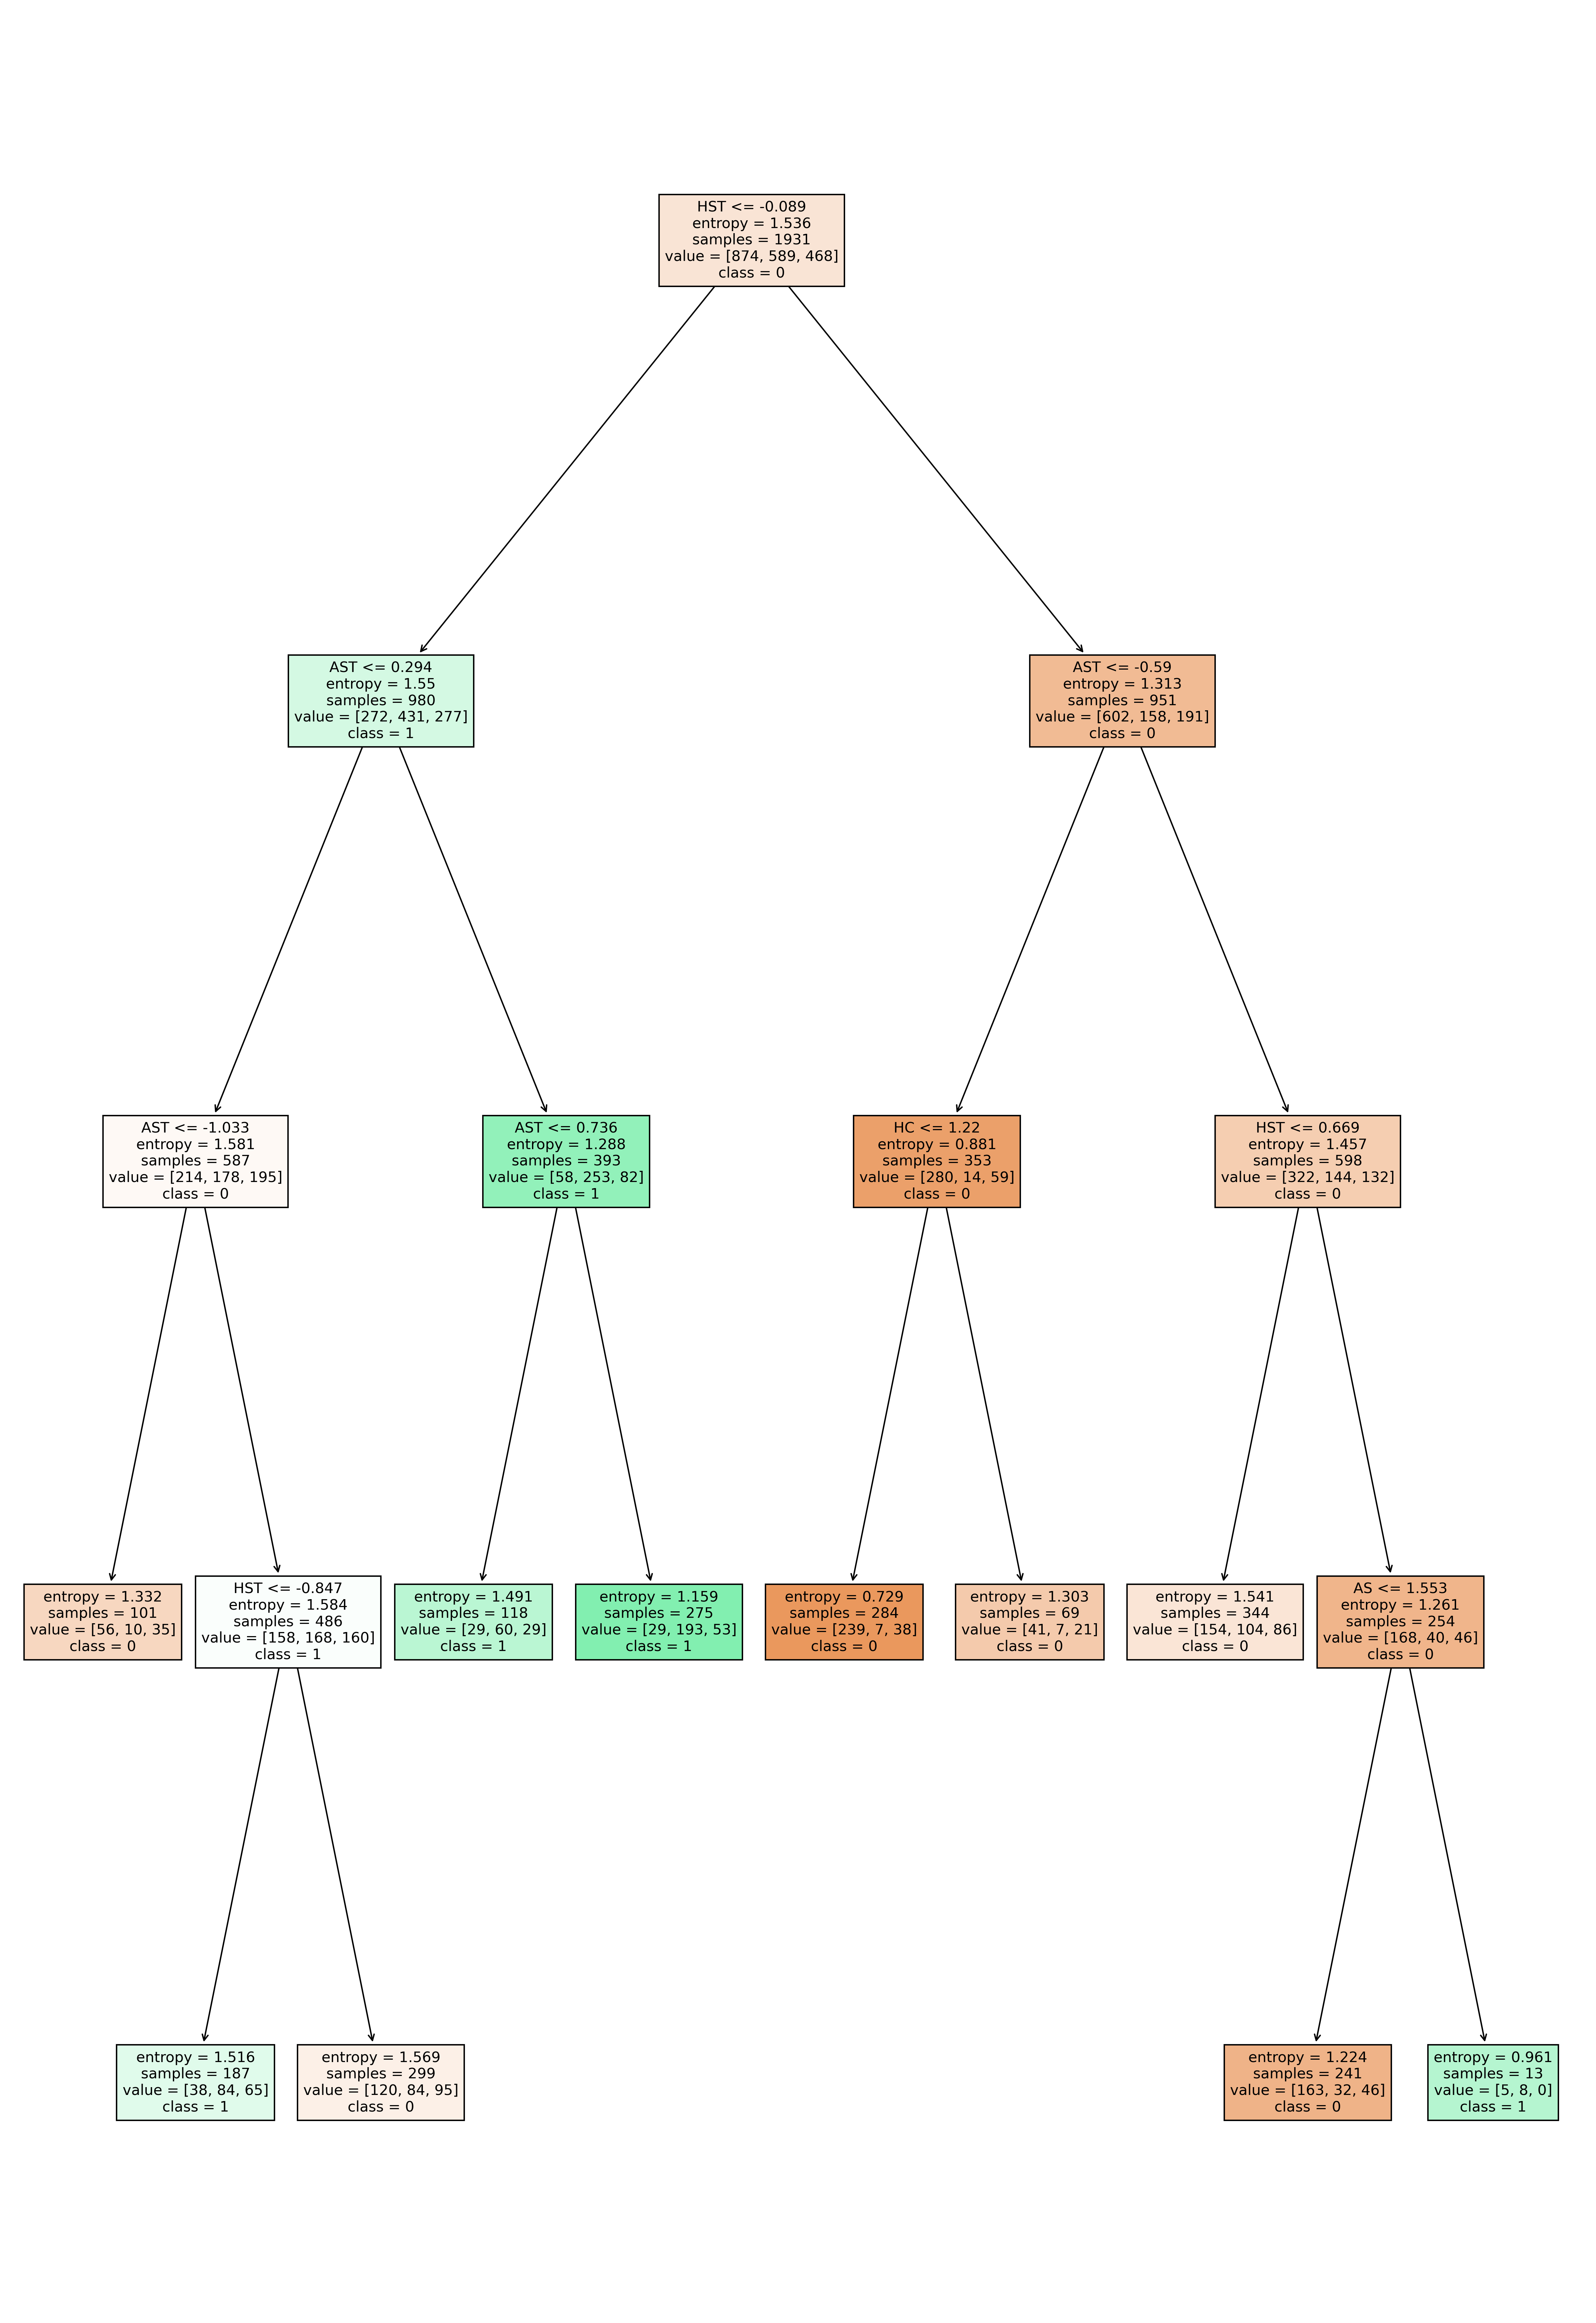

In [29]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,30), dpi=300)
tree.plot_tree(
    clf_train,
    feature_names = fn, 
    class_names=cn,           
    filled = True);

# 0 = Home win
# 1 = Away win
# 2 = Draw

Helpful link: https://towardsdatascience.com/scikit-learn-decision-trees-explained-803f3812290d

# Test With a Recent Game

Game Used: Man City vs Chelsea FA Cup (4/17/2021) -- Chelsea won (ie the Home Team won)

Data came from these links and our data
- https://www.espn.com/soccer/matchstats?gameId=597190
- https://www.si.com/soccer/manchestercity/match-coverage/manchester-city-vs-chelsea-where-to-watch-team-news-referees-everything-you-need-to-know

In [30]:
list(X.columns) # The values we need to make a prediction 

['Season Encoding',
 'HomeTeam Encoding',
 'AwayTeam Encoding',
 'Referee Encoding',
 'Fouls Called Per Game',
 'HS',
 'AS',
 'HST',
 'AST',
 'HF',
 'AF',
 'HC',
 'AC',
 'HY',
 'AY',
 'HR',
 'AR',
 'YearOfSeason Encoding']

In [31]:
# Data came from these links and our data

test_game = np.array([
    2, # 2 bc it took place in Spring
    5, # Chelsea: 5 in the Team encoding
    14, # Man City: 14 in the Team encoding
    #0,
    #0,
    23, # Mike Dean was the referee
    14, # got from our data
    5,
    11,
    3,
    3,
    8,
    12,
    3,
    8,
    2,
    3,
    0,
    0,
    6 # 6 bc its the 2020/2021 season
            ]).reshape(1, -1)

result = clf_train.predict(test_game)
print(result)

if result[0] == 0:
    print("Correct!",end=' ')
else:
    print("Incorrect!",end=' ')
    
print("Chelsea, the Home Team, won.")

[1]
Incorrect! Chelsea, the Home Team, won.


### Now Will Try It Using Averages

Note: Only used integer values, any decimal was cut off, there was no rounding. Eg, 16.75 would just be 16.

Data sources links:
    - https://www.premierleague.com/stats/top/clubs/total_cross
    - https://www.premierleague.com/clubs/4/Chelsea/stats?se=363
    - https://www.premierleague.com/clubs/11/Manchester-City/stats?se=363

In [32]:
test_game_averages = np.array([
    2, # 2 bc it took place in Spring
    5, # Chelsea: 5 in the Team encoding
    14, # Man City: 14 in the Team encoding
    #0,
    #0,
    23, # Mike Dean was the referee
    14, # got from our data
    14, # Chelsea Shots per game avg
    15, # Man City Shots per game avg 
    5, # Chelsea Shots on target per game avg
    5, # Man City Shots on target per game avg 
    6, # Chelsea Fouls per game avg
    5, # Man City Fouls per game avg 
    20, # Chelsea Crosses per game avg
    16, # Man City Crosses per game avg 
    1, # Chelsea Yellow Cards per game avg
    1, # Man City Yellow Cards per game avg 
    0, # Chelsea Red Cards per game avg
    0, # Man City Red Cards per game avg 
    6 # 6 bc its the 2020/2021 season
]).reshape(1, -1)

result = clf_train.predict(test_game_averages)
print(result)

if result[0] == 0:
    print("Correct!",end=' ')
else:
    print("Incorrect!",end=' ')
    
print("Chelsea, the Home Team, won.")

[1]
Incorrect! Chelsea, the Home Team, won.
